# pandas in  10 minutes
- this is short introduction of pandas and for more complex study [Cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook)


In [67]:
# import library as 
import numpy as np
import pandas as pd

## Basic data sturcture in pandas
- pandas provides two type of classes for handling data:
1. Series: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc
2. DataFrame: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

In [68]:
dates = pd.date_range('20140101',periods=10)
# Creates a DatetimeIndex of 10 sequential dates starting from '2014-01-01', used to label the rows (index) in a DataFrame.
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10'],
              dtype='datetime64[ns]', freq='D')

In [69]:
df = pd.DataFrame(np.random.randn(10,4), index=dates, columns=list('ABCD'))
# A DataFrame with 10 rows (indexed by dates), 4 columns labeled 'A', 'B', 'C', 'D', filled with random values.
df

,A,B,C,D
2014-01-01,0.273234,-0.641661,-1.471072,0.428976
2014-01-02,1.749498,-0.730570,0.631203,-1.518797
2014-01-03,2.311720,1.124163,0.983949,-0.038041
2014-01-04,1.212326,0.304925,-0.173717,-0.618243
2014-01-05,1.878714,-1.484140,-1.234753,-0.381228
2014-01-06,-0.802883,-0.463770,0.030311,0.840288
2014-01-07,0.752416,0.971922,0.124669,1.163938
2014-01-08,-0.063960,-0.446147,-1.997044,2.454370
2014-01-09,1.071900,1.651718,0.210094,0.064360
2014-01-10,-0.718021,0.697827,0.962315,-0.039543


#### Creating a DataFrame by passing a dictionary of objects where the keys are the column labels and the values are the column values.

In [70]:
df2 = pd.DataFrame({
    'A': 1.0,
    'B':pd.Timestamp('20130202'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3]*4, dtype='int32'),
    'E': pd.Categorical(['train','test','train','test']),
    'F': 'foo' 
}
)
df2

,A,B,C,D,E,F
0,1.0,2013-02-02,1.0,3,train,foo
1,1.0,2013-02-02,1.0,3,test,foo
2,1.0,2013-02-02,1.0,3,train,foo
3,1.0,2013-02-02,1.0,3,test,foo


- columns of dataframe has different dtype 

In [71]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

## Viewing data
- use dataframe.head() and dataframe.tail() , we can see first and last five rows of data.

In [72]:
df.head()  # first or top five rows of data show in output

,A,B,C,D
2014-01-01,0.273234,-0.641661,-1.471072,0.428976
2014-01-02,1.749498,-0.730570,0.631203,-1.518797
2014-01-03,2.311720,1.124163,0.983949,-0.038041
2014-01-04,1.212326,0.304925,-0.173717,-0.618243
2014-01-05,1.878714,-1.484140,-1.234753,-0.381228


In [73]:
df.tail()  # last or bottom five rows of data show in output.

,A,B,C,D
2014-01-06,-0.802883,-0.463770,0.030311,0.840288
2014-01-07,0.752416,0.971922,0.124669,1.163938
2014-01-08,-0.063960,-0.446147,-1.997044,2.454370
2014-01-09,1.071900,1.651718,0.210094,0.064360
2014-01-10,-0.718021,0.697827,0.962315,-0.039543


- displaying dataframe.index or dataframe. columns means that show all columns name in dataset.

In [74]:
# df.index
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- Return a NumPy representation of the underlying data with DataFrame.to_numpy() without the index or column labels:

In [75]:
df.to_numpy()

array([[ 0.27323444, -0.64166106, -1.47107171,  0.42897574],
       [ 1.74949804, -0.73056975,  0.63120283, -1.51879735],
       [ 2.31172015,  1.12416307,  0.98394942, -0.03804149],
       [ 1.21232603,  0.30492504, -0.17371696, -0.61824331],
       [ 1.87871448, -1.48413993, -1.23475329, -0.38122761],
       [-0.80288304, -0.46377017,  0.03031148,  0.84028812],
       [ 0.75241601,  0.97192157,  0.12466866,  1.16393777],
       [-0.06395961, -0.44614688, -1.9970439 ,  2.45436976],
       [ 1.0719003 ,  1.65171759,  0.21009376,  0.06436024],
       [-0.71802106,  0.69782707,  0.96231525, -0.03954261]])

### Note:
- NumPy arrays have one dtype for the entire array while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. If the common data type is object, DataFrame.to_numpy() will require copying data.

In [76]:
print(df2.dtypes)
print("-------------------------")
print(df2.to_numpy())

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object
-------------------------
[[1.0 Timestamp('2013-02-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-02-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-02-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-02-02 00:00:00') 1.0 3 'test' 'foo']]


- use ``` describe() ``` for short statistics summary. but give only numeric columns output.

In [77]:
df.head()

,A,B,C,D
2014-01-01,0.273234,-0.641661,-1.471072,0.428976
2014-01-02,1.749498,-0.730570,0.631203,-1.518797
2014-01-03,2.311720,1.124163,0.983949,-0.038041
2014-01-04,1.212326,0.304925,-0.173717,-0.618243
2014-01-05,1.878714,-1.484140,-1.234753,-0.381228


In [78]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.766495,0.098427,-0.193404,0.235608
std,1.079248,0.998992,1.037422,1.082955
min,-0.802883,-1.484140,-1.997044,-1.518797
25%,0.020339,-0.597188,-0.969494,-0.295806
50%,0.912158,-0.070611,0.077490,0.013159
75%,1.615205,0.903398,0.525926,0.737460
max,2.311720,1.651718,0.983949,2.454370


- we can take trnasform of the data as mean row change in columns.

In [79]:
# df.T

- use ``` sort_index()``` for sort data as ascending or decending order.

In [80]:
df.sort_index(axis=1, ascending=False) # Sorts the column names in descending order (C, B, A) and rearranges the DataFrame accordingly.
# Sorts the index (row labels if axis=0, column labels if axis=1) of the DataFrame.
# ascending=False= Sorts in descending order (Z to A, or highest to lowest)., Use True for ascending (A to Z).

,D,C,B,A
2014-01-01,0.428976,-1.471072,-0.641661,0.273234
2014-01-02,-1.518797,0.631203,-0.730570,1.749498
2014-01-03,-0.038041,0.983949,1.124163,2.311720
2014-01-04,-0.618243,-0.173717,0.304925,1.212326
2014-01-05,-0.381228,-1.234753,-1.484140,1.878714
2014-01-06,0.840288,0.030311,-0.463770,-0.802883
2014-01-07,1.163938,0.124669,0.971922,0.752416
2014-01-08,2.454370,-1.997044,-0.446147,-0.063960
2014-01-09,0.064360,0.210094,1.651718,1.071900
2014-01-10,-0.039543,0.962315,0.697827,-0.718021


- use ```sort_value()``` sort by values

In [81]:
df.sort_values(by='B')

,A,B,C,D
2014-01-05,1.878714,-1.484140,-1.234753,-0.381228
2014-01-02,1.749498,-0.730570,0.631203,-1.518797
2014-01-01,0.273234,-0.641661,-1.471072,0.428976
2014-01-06,-0.802883,-0.463770,0.030311,0.840288
2014-01-08,-0.063960,-0.446147,-1.997044,2.454370
2014-01-04,1.212326,0.304925,-0.173717,-0.618243
2014-01-10,-0.718021,0.697827,0.962315,-0.039543
2014-01-07,0.752416,0.971922,0.124669,1.163938
2014-01-03,2.311720,1.124163,0.983949,-0.038041
2014-01-09,1.071900,1.651718,0.210094,0.064360


# Selection
### Note
- While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc().
#### Getitem([])
- For a DataFrame, passing a single label selects a columns and yields a Series equivalent to df.A:

In [82]:
df['A']

2014-01-01    0.273234
2014-01-02    1.749498
2014-01-03    2.311720
2014-01-04    1.212326
2014-01-05    1.878714
2014-01-06   -0.802883
2014-01-07    0.752416
2014-01-08   -0.063960
2014-01-09    1.071900
2014-01-10   -0.718021
Freq: D, Name: A, dtype: float64

- For a DataFrame, passing a slice : selects matching rows:

In [83]:
df[0:3] # Just like my_list[0:3] gives the first 3 items(rows).

,A,B,C,D
2014-01-01,0.273234,-0.641661,-1.471072,0.428976
2014-01-02,1.749498,-0.730570,0.631203,-1.518797
2014-01-03,2.311720,1.124163,0.983949,-0.038041


#### Selection by label
- Selecting a row matching a label:

In [84]:
df.loc[dates[0]]  # Selects the row in DataFrame df that has the index equal to dates[0].
# .loc[]:Accesses data by label (not position)., dates[0] is the first date in your datetime index.

A    0.273234
B   -0.641661
C   -1.471072
D    0.428976
Name: 2014-01-01 00:00:00, dtype: float64

- Selecting all rows (:) with a select column labels:

In [85]:
df.loc[:,['A','B']]

,A,B
2014-01-01,0.273234,-0.641661
2014-01-02,1.749498,-0.730570
2014-01-03,2.311720,1.124163
2014-01-04,1.212326,0.304925
2014-01-05,1.878714,-1.484140
2014-01-06,-0.802883,-0.463770
2014-01-07,0.752416,0.971922
2014-01-08,-0.063960,-0.446147
2014-01-09,1.071900,1.651718
2014-01-10,-0.718021,0.697827


- For label slicing, both endpoints are included:

In [86]:
df.loc['20140101':'20140104',['A','B']]

,A,B
2014-01-01,0.273234,-0.641661
2014-01-02,1.749498,-0.730570
2014-01-03,2.311720,1.124163
2014-01-04,1.212326,0.304925


- Selecting a single row and column label returns a scalar:

In [87]:
# print(df.loc[dates[0],'A'])
df.loc[dates[0],'A']

np.float64(0.27323443918029594)

- For getting fast access to a scalar (equivalent to the prior method):

In [88]:
df.at[dates[0], 'A']

np.float64(0.27323443918029594)

#### Selection by position
- Select via the position of the passed integers:

In [89]:
df.iloc[3]  # Selects the 4th row (index position 3) from the DataFrame df using integer-based indexing.
#  Returns the row at position 3 (i.e., the 4th row).
# .iloc[]:= Stands for integer-location., Used to access rows/columns by position, not by label.
# 

A    1.212326
B    0.304925
C   -0.173717
D   -0.618243
Name: 2014-01-04 00:00:00, dtype: float64

- Integer slices acts similar to NumPy/Python:

In [90]:
df.iloc[3:5, 0:2]  # Selects rows 3 and 4 (index positions 3 to 4) and columns 0 and 1 from DataFrame df, using integer-based indexing.
# 3:5 → rows at positions 3 and 4 (excludes 5)., 0:2 → columns at positions 0 and 1 (excludes 2).

,A,B
2014-01-04,1.212326,0.304925
2014-01-05,1.878714,-1.484140


- Lists of integer position locations:

In [91]:
df.iloc[[1,2,3], [0,2]]  # Selects rows at positions 1, 2, 3 and columns at positions 0 and 2 from the DataFrame df using integer-based indexing.
# rows → [1, 2, 3] (2nd, 3rd, and 4th rows), columns → [0, 2] (1st and 3rd columns)

,A,C
2014-01-02,1.749498,0.631203
2014-01-03,2.311720,0.983949
2014-01-04,1.212326,-0.173717


- For slicing rows explicitly:

In [92]:
df.iloc[1:3, :]

,A,B,C,D
2014-01-02,1.749498,-0.730570,0.631203,-1.518797
2014-01-03,2.311720,1.124163,0.983949,-0.038041


- For slicing columns explicitly:

In [93]:
df.iloc[:, 1:3]

,B,C
2014-01-01,-0.641661,-1.471072
2014-01-02,-0.730570,0.631203
2014-01-03,1.124163,0.983949
2014-01-04,0.304925,-0.173717
2014-01-05,-1.484140,-1.234753
2014-01-06,-0.463770,0.030311
2014-01-07,0.971922,0.124669
2014-01-08,-0.446147,-1.997044
2014-01-09,1.651718,0.210094
2014-01-10,0.697827,0.962315


- For getting a value explicitly:

In [94]:
df.iloc[1,1]

np.float64(-0.7305697540089688)

- For getting fast access to a scalar (equivalent to the prior method):

In [95]:
df.iat[1,1]

np.float64(-0.7305697540089688)

## Boolean indexing
- Select rows where df.A is greater than 0.

In [96]:
df[df['A']>2] # Returns only the rows where column 'A' has values greater than 2.
#  df['A'] > 2 → creates a boolean Series (True/False for each row)., df[...] → filters rows where condition is True.

,A,B,C,D
2014-01-03,2.31172,1.124163,0.983949,-0.038041


- Selecting values from a DataFrame where a boolean condition is met:

In [97]:
df[df>0]

,A,B,C,D
2014-01-01,0.273234,NaN,NaN,0.428976
2014-01-02,1.749498,NaN,0.631203,NaN
2014-01-03,2.311720,1.124163,0.983949,NaN
2014-01-04,1.212326,0.304925,NaN,NaN
2014-01-05,1.878714,NaN,NaN,NaN
2014-01-06,NaN,NaN,0.030311,0.840288
2014-01-07,0.752416,0.971922,0.124669,1.163938
2014-01-08,NaN,NaN,NaN,2.454370
2014-01-09,1.071900,1.651718,0.210094,0.064360
2014-01-10,NaN,0.697827,0.962315,NaN


- Using isin() method for filtering:

In [98]:
df2= df.copy()
df2['E'] = ['one', 'one', 'two','three','four','five','six','seven','eight','nine']  # add column
df2

,A,B,C,D,E
2014-01-01,0.273234,-0.641661,-1.471072,0.428976,one
2014-01-02,1.749498,-0.730570,0.631203,-1.518797,one
2014-01-03,2.311720,1.124163,0.983949,-0.038041,two
2014-01-04,1.212326,0.304925,-0.173717,-0.618243,three
2014-01-05,1.878714,-1.484140,-1.234753,-0.381228,four
2014-01-06,-0.802883,-0.463770,0.030311,0.840288,five
2014-01-07,0.752416,0.971922,0.124669,1.163938,six
2014-01-08,-0.063960,-0.446147,-1.997044,2.454370,seven
2014-01-09,1.071900,1.651718,0.210094,0.064360,eight
2014-01-10,-0.718021,0.697827,0.962315,-0.039543,nine


In [99]:
df2[df2['E'].isin(['one', 'nine'])]

,A,B,C,D,E
2014-01-01,0.273234,-0.641661,-1.471072,0.428976,one
2014-01-02,1.749498,-0.730570,0.631203,-1.518797,one
2014-01-10,-0.718021,0.697827,0.962315,-0.039543,nine


#### Setting
- Setting a new column automatically aligns the data by the indexes:

In [100]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20140101', periods=6))
s1

2014-01-01    1
2014-01-02    2
2014-01-03    3
2014-01-04    4
2014-01-05    5
2014-01-06    6
Freq: D, dtype: int64

In [101]:
df['F'] = s1

- Setting values by label:

In [102]:
df.at[dates[0], 'A'] = 0

- Setting values by position:

In [103]:
df.iat[1,2] = 0

- Setting by assigning with a NumPy array:

In [104]:
df.loc[:, 'D']  = np.array([5] * len(df))


- The result of the prior setting operations:

In [105]:
df

,A,B,C,D,F
2014-01-01,0.000000,-0.641661,-1.471072,5.0,1.0
2014-01-02,1.749498,-0.730570,0.000000,5.0,2.0
2014-01-03,2.311720,1.124163,0.983949,5.0,3.0
2014-01-04,1.212326,0.304925,-0.173717,5.0,4.0
2014-01-05,1.878714,-1.484140,-1.234753,5.0,5.0
2014-01-06,-0.802883,-0.463770,0.030311,5.0,6.0
2014-01-07,0.752416,0.971922,0.124669,5.0,NaN
2014-01-08,-0.063960,-0.446147,-1.997044,5.0,NaN
2014-01-09,1.071900,1.651718,0.210094,5.0,NaN
2014-01-10,-0.718021,0.697827,0.962315,5.0,NaN


- A where operation with setting:

In [106]:
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,F
2014-01-01,0.000000,-0.641661,-1.471072,-5.0,-1.0
2014-01-02,-1.749498,-0.730570,0.000000,-5.0,-2.0
2014-01-03,-2.311720,-1.124163,-0.983949,-5.0,-3.0
2014-01-04,-1.212326,-0.304925,-0.173717,-5.0,-4.0
2014-01-05,-1.878714,-1.484140,-1.234753,-5.0,-5.0
2014-01-06,-0.802883,-0.463770,-0.030311,-5.0,-6.0
2014-01-07,-0.752416,-0.971922,-0.124669,-5.0,NaN
2014-01-08,-0.063960,-0.446147,-1.997044,-5.0,NaN
2014-01-09,-1.071900,-1.651718,-0.210094,-5.0,NaN
2014-01-10,-0.718021,-0.697827,-0.962315,-5.0,NaN


Missing data:
For NumPy data types, np.nan represents missing data. It is by default not included in computations.

In [107]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2014-01-01,0.000000,-0.641661,-1.471072,5.0,1.0,1.0
2014-01-02,1.749498,-0.730570,0.000000,5.0,2.0,1.0
2014-01-03,2.311720,1.124163,0.983949,5.0,3.0,NaN
2014-01-04,1.212326,0.304925,-0.173717,5.0,4.0,NaN


In [108]:
df1.dropna(how="any")  # drop any values from tha dataset on condition based

,A,B,C,D,F,E
2014-01-01,0.000000,-0.641661,-1.471072,5.0,1.0,1.0
2014-01-02,1.749498,-0.730570,0.000000,5.0,2.0,1.0


In [109]:
df1.fillna(value=5)  # Replaces all NaN values in df1 with 5.

,A,B,C,D,F,E
2014-01-01,0.000000,-0.641661,-1.471072,5.0,1.0,1.0
2014-01-02,1.749498,-0.730570,0.000000,5.0,2.0,1.0
2014-01-03,2.311720,1.124163,0.983949,5.0,3.0,5.0
2014-01-04,1.212326,0.304925,-0.173717,5.0,4.0,5.0


isna() gets the boolean mask where values are nan

In [110]:
pd.isna(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,False,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


## Operations

Stats:
calculate  mean/average value for each column

In [111]:
df.mean()

A    0.739171
B    0.098427
C   -0.256525
D    5.000000
F    3.500000
dtype: float64

In [112]:
# Calculate the mean value for each row:
df.mean(axis=1)

2014-01-01    0.777453
2014-01-02    1.603786
2014-01-03    2.483967
2014-01-04    2.068707
2014-01-05    1.831964
2014-01-06    1.952732
2014-01-07    1.712252
2014-01-08    0.623212
2014-01-09    1.983428
2014-01-10    1.485530
Freq: D, dtype: float64

In [114]:
s = pd.Series([1, 3, 5, np.nan, 6, 8,7, 44, np.nan,10], index=dates).shift(2)
s

2014-01-01     NaN
2014-01-02     NaN
2014-01-03     1.0
2014-01-04     3.0
2014-01-05     5.0
2014-01-06     NaN
2014-01-07     6.0
2014-01-08     8.0
2014-01-09     7.0
2014-01-10    44.0
Freq: D, dtype: float64

In [115]:
df.sub(s, axis="index")

,A,B,C,D,F
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,NaN,NaN,NaN,NaN,NaN
2014-01-03,1.311720,0.124163,-0.016051,4.0,2.0
2014-01-04,-1.787674,-2.695075,-3.173717,2.0,1.0
2014-01-05,-3.121286,-6.484140,-6.234753,0.0,0.0
2014-01-06,NaN,NaN,NaN,NaN,NaN
2014-01-07,-5.247584,-5.028078,-5.875331,-1.0,NaN
2014-01-08,-8.063960,-8.446147,-9.997044,-3.0,NaN
2014-01-09,-5.928100,-5.348282,-6.789906,-2.0,NaN
2014-01-10,-44.718021,-43.302173,-43.037685,-39.0,NaN


### User defined functions
DataFrame.agg() and DataFrame.transform() applies a user defined function that reduces or broadcasts its result respectively.

In [116]:
df.agg(lambda x: np.mean(x) * 5.6)

A     4.139358
B     0.551189
C    -1.436538
D    28.000000
F    19.600000
dtype: float64

In [117]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2014-01-01,0.000000,-64.936100,-148.872457,506.0,101.2
2014-01-02,177.049202,-73.933659,0.000000,506.0,202.4
2014-01-03,233.946079,113.765302,99.575681,506.0,303.6
2014-01-04,122.687394,30.858414,-17.580156,506.0,404.8
2014-01-05,190.125905,-150.194961,-124.957033,506.0,506.0
2014-01-06,-81.251764,-46.933541,3.067521,506.0,607.2
2014-01-07,76.144500,98.358463,12.616469,506.0,NaN
2014-01-08,-6.472712,-45.150064,-202.100842,506.0,NaN
2014-01-09,108.476310,167.153820,21.261489,506.0,NaN
2014-01-10,-72.663731,70.620099,97.386303,506.0,NaN


### Value Counts

In [123]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    5
2    5
3    6
4    3
5    6
6    6
7    2
8    1
9    0
dtype: int32

In [124]:
s.value_counts()

6    3
2    2
5    2
3    1
1    1
0    1
Name: count, dtype: int64

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. 

In [125]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

##### Merge
##### Concat
pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.
Concatenating pandas objects together row-wise with concat():

In [127]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.397824,1.048142,0.677870,-0.782194
1,-0.253364,-1.026965,-0.084511,-0.550973
2,0.711154,1.375142,1.153816,1.405497
3,1.127012,0.019640,-1.170322,-2.127581
4,1.179151,-0.481835,-2.577717,0.428843
5,-1.285916,0.021687,2.098156,-1.104355
6,0.362697,-1.527640,1.569821,-0.997118
7,-0.180655,0.836678,0.749957,-1.477349
8,-0.311606,0.300083,0.662718,-0.470061
9,0.210392,-0.749175,0.340427,-0.116974


In [129]:
# break into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.397824,1.048142,0.677870,-0.782194
1,-0.253364,-1.026965,-0.084511,-0.550973
2,0.711154,1.375142,1.153816,1.405497
3,1.127012,0.019640,-1.170322,-2.127581
4,1.179151,-0.481835,-2.577717,0.428843
5,-1.285916,0.021687,2.098156,-1.104355
6,0.362697,-1.527640,1.569821,-0.997118
7,-0.180655,0.836678,0.749957,-1.477349
8,-0.311606,0.300083,0.662718,-0.470061
9,0.210392,-0.749175,0.340427,-0.116974


#### Join
merge() enables SQL style join types along specific columns. 

In [132]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [133]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Grouping
By “group by” we are referring to a process involving one or more of the following steps:
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [135]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-1.575057,0.074033
1,bar,one,-1.179139,2.116085
2,foo,two,0.135775,0.682168
3,bar,three,0.041115,-1.016527
4,foo,two,-0.628822,1.275519
5,bar,two,-0.808579,-0.271715
6,foo,one,-0.650894,-1.288592
7,foo,three,-0.472397,-0.326286


Grouping by a column label, selecting column labels, and then applying the DataFrameGroupBy.sum() function to the resulting groups:

In [136]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-1.946603,0.827843
foo,-3.191395,0.416842


In [137]:
# Grouping by multiple columns label forms MultiIndex.
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.179139  2.116085
    three  0.041115 -1.016527
    two   -0.808579 -0.271715
foo one   -2.225951 -1.214558
    three -0.472397 -0.326286
    two   -0.493047  1.957687

#### Reshaping
##### Stack


In [140]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.770238 -1.013144
      two    -0.226911  0.934329
baz   one    -0.629084  0.364721
      two     0.821465  0.822893

In [141]:
# The stack() method “compresses” a level in the DataFrame’s columns:
stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A   -0.770238
               B   -1.013144
       two     A   -0.226911
               B    0.934329
baz    one     A   -0.629084
               B    0.364721
       two     A    0.821465
               B    0.822893
dtype: float64

In [142]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

stacked.unstack()

A         B
first second                    
bar   one    -0.770238 -1.013144
      two    -0.226911  0.934329
baz   one    -0.629084  0.364721
      two     0.821465  0.822893

In [143]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.770238 -0.226911
      B -1.013144  0.934329
baz   A -0.629084  0.821465
      B  0.364721  0.822893

In [144]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.770238 -0.629084
       B -1.013144  0.364721
two    A -0.226911  0.821465
       B  0.934329  0.822893

#### Pivot tables

In [145]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.324815,1.756764
1,one,B,foo,-0.520261,-0.990261
2,two,C,foo,-0.334492,-0.635739
3,three,A,bar,-0.680747,1.286630
4,one,B,bar,0.555790,-0.149188
5,one,C,bar,0.472705,-1.451200
6,two,A,foo,-0.867509,0.820580
7,three,B,foo,-0.921947,-0.903532
8,one,C,foo,0.530438,-1.191988
9,one,A,bar,0.049898,-0.281940


In [147]:
# pivot_table() pivots a DataFrame specifying the values, index and columns
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.049898 -0.324815
      B  0.555790 -0.520261
      C  0.472705  0.530438
three A -0.680747       NaN
      B       NaN -0.921947
      C  0.302894       NaN
two   A       NaN -0.867509
      B -1.168914       NaN
      C       NaN -0.334492

#### Time series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [148]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    26476
Freq: 5min, dtype: int32

In [150]:
# Series.tz_localize() localizes a time series to a time zone:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -1.479163
2012-03-07    2.342405
2012-03-08   -1.013699
2012-03-09   -1.209002
2012-03-10    0.088413
Freq: D, dtype: float64

In [153]:
# Series.tz_convert() converts a timezones aware time series to another time zone:
# ts_utc =ts_utc.tz_convert("US/Eastern")

In [156]:
rng
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

#### Categoricals
pandas can include categorical data in a DataFrame.

In [158]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [160]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)

Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default):

In [161]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [162]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [163]:
# Grouping by a categorical column with observed=False also shows empty categories:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting

In [165]:
import matplotlib.pyplot as plt
plt.close("all")

<Axes: >

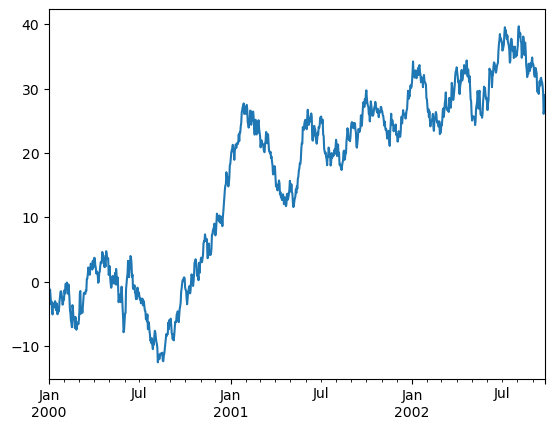

In [166]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

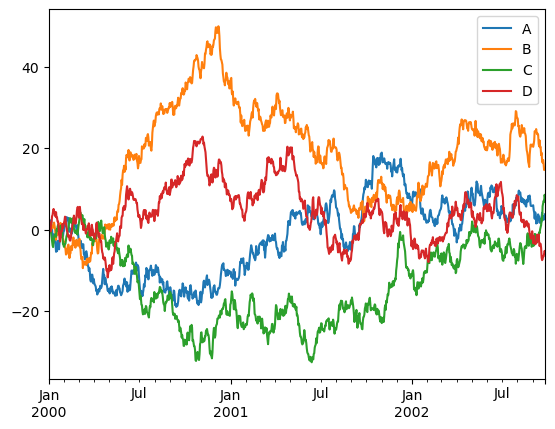

In [167]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')